# Linear Programming

This code uses graphical method which solves for the intercepts, feasible region, intersecting points, and optimal solution for maximization.

Minimum requirement: input validation

#### Created by:
- Carrillo, Charlot Andrea
- Barcelona, Manuel Marc
- Castro, Lorens
- Dellupac, Yohan
- Francisco, Maxell June
- Serrano, Emman

### 1. Import necessary packages
- matplotlib for plotting the x and y intercepts, points
- linprog will be our solver for linear programming
- pandas for creating data frames (x and y table)
- numpy for algebra, operations, etc



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import pandas as pd

### 2. Input validation function for integer

In [2]:
def get_input(x):
    while True:
        try:
            value = int(input(x))
            return value
        except ValueError:
            print("Invalid input. Please enter an integer.")


### 3. Input validation function for float

In [3]:
def get_input2(x):
    while True:
        try:
            value = float(input(x))
            return value
        except ValueError:
            print("Invalid input. Please enter an integer.")

### 4. Getting the coefficients for the objective function

In [4]:
obj_func_coef1 = get_input2("Enter 1st coefficient for the objective function (X1): ")
obj_func_coef2 = get_input2("Enter 2nd coefficient for the objective function (X2): ")

obj_func_coefs = [-(obj_func_coef1), -(obj_func_coef2)]
print(obj_func_coefs)

[-90.0, -180.0]


### 5. Getting the number of constraints

In [5]:
while True:
    try:
        num_func = get_input(input("Enter the number of constraint equations: "))
        if num_func <= 1 or num_func > 2:
            print("Limit reached/not reached. Enter 2.")
            continue
        break
    except ValueError:
        print("Invalid input. Please enter an integer.")
    
constraints = [[] for _ in range(num_func)]
right_hand_values = []

print(f"Number of constraint equations: {num_func}")

Number of constraint equations: 2


### 6. Getting the labels for each constraint equations

In [6]:
constraint_names = []
for i in range(num_func):
    while True:
        try:
            constraint_label = str(input(f"Enter the label for constraint {i+1}: "))
            constraint_names.append(constraint_label)
            break
        except ValueError:
            print("Invalid input. Please enter a string.")
            
            
for idx, label in enumerate(constraint_names):
    print(f"Label {idx + 1}: {label}")

Label 1: Time
Label 2: Cost


### 7. Getting the coefficients for each constraint equations

In [7]:

for i in range(num_func):
        while True:
            try:
                num_coefficients = get_input(f"How many coefficients for {constraint_names[i]}? ")
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        for j in range(num_coefficients):
            while True:
                try:
                    value = float(input(f"Enter coefficient {j + 1} for {constraint_names[i]}: "))
                    constraints[i].append(value)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")
                    
        right = int(input(f"Enter right hand value for inequality {constraint_names[i]}: "))
        right_hand_values.append(right)

print("Coefficients for the inequality constraints:")
for idx, constraint in enumerate(constraints):
    print(f"{constraint_names[idx]} coefficients: {constraint} <= {right_hand_values[idx]}")


Coefficients for the inequality constraints:
Time coefficients: [2.0, 5.0] <= 40
Cost coefficients: [15.0, 45.0] <= 315


### 8. Functions for calculating intersections, coordinates, and feasible region

In [8]:
def calculate_intersection(constraint1, right1, constraint2, right2):
    a1, b1 = constraint1
    a2, b2 = constraint2
    
    denom = a1 * b2 - a2 * b1
    if denom == 0:
        print("The lines are parallel and do not intersect.")
        return None
    
    x = (b2 * right1 - b1 * right2) / denom
    y = (a1 * right2 - a2 * right1) / denom
    
    return (x, y)

def calculate_intercepts(constraint, right):
    a, b = constraint
    
    #a = x, b = y
    #calculation for x intercept
    if a != 0:
        x_intercept = right / a
    else:
        x_intercept = float('inf') #if a = 0, then that means there is no x (minimum coef is 1)

    #calculation for y intercept (x = 0)
    if b != 0:
        y_intercept = right / b
    else:
        y_intercept = float('inf')  #if b = 0, then that means there is no y (minimum coef is 1)

    return (x_intercept, 0), (0, y_intercept)

vertices = []

for i in range(num_func):
    x, y = calculate_intercepts(constraints[i], right_hand_values[i])
    vertices.append(x)
    vertices.append(y)

def is_feasible(point):
    x, y = point
    for i in range(num_func):
        a, b = constraints[i]
        if a * x + b * y > right_hand_values[i]:  # Check if point is within the inequality
            return False
    return True

feasible_points = [point for point in vertices if is_feasible(point)]

print("Intercepts:")
for idx, (x, y) in enumerate(vertices):
    print(f"Intercept {idx + 1}: (x, y) = ({x:.2f}, {y:.2f})")
    
for i in range(num_func):
    for j in range(i + 1, num_func):
        intersection = calculate_intersection(constraints[i], right_hand_values[i], constraints[j], right_hand_values[j])
        if intersection:
            vertices.append(intersection)
            print("Intersecting points: ", intersection)
    
print("\nFeasible vertices of the region:")
if feasible_points:
    for idx, (x, y) in enumerate(feasible_points):
        print(f"Feasible Point {idx + 1}: (x, y) = ({x:.2f}, {y:.2f})")
else:
    print("No feasible points found.")
    
data = []
for x1, x2 in feasible_points:
    z = obj_func_coef1 * x1 + obj_func_coef2 * x2
    data.append((x1, x2, z))

Intercepts:
Intercept 1: (x, y) = (20.00, 0.00)
Intercept 2: (x, y) = (0.00, 8.00)
Intercept 3: (x, y) = (21.00, 0.00)
Intercept 4: (x, y) = (0.00, 7.00)
Intersecting points:  (15.0, 2.0)

Feasible vertices of the region:
Feasible Point 1: (x, y) = (20.00, 0.00)
Feasible Point 2: (x, y) = (0.00, 7.00)


### 9. Linear Programming function

In [9]:

# Bounds for x and y (non-negativity constraints)
x0_bounds = (0, None)  
x1_bounds = (0, None)

# Solve the linear programming problem
result = linprog(obj_func_coefs, A_ub=constraints, b_ub=right_hand_values, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal values for X1 and X2
optimal_x1 = result.x[0]
optimal_x2 = result.x[1]
z = -result.fun


### 10. Displaying x, y, and z table using data frame

In [10]:
df = pd.DataFrame(data, columns=['(X1)', '(X2)', 'Z'])
print("Optimal X1, X2, Z Values:")
print(df)
print("\nOptimal number of X1:", optimal_x1)
print("Optimal number of X2:", optimal_x2)
print("Maximized Z: ", z)



Optimal X1, X2, Z Values:
   (X1)  (X2)       Z
0  20.0   0.0  1800.0
1   0.0   7.0  1260.0

Optimal number of X1: 20.0
Optimal number of X2: 0.0
Maximized Z:  1800.0


### 11. Graphing the optimal solution

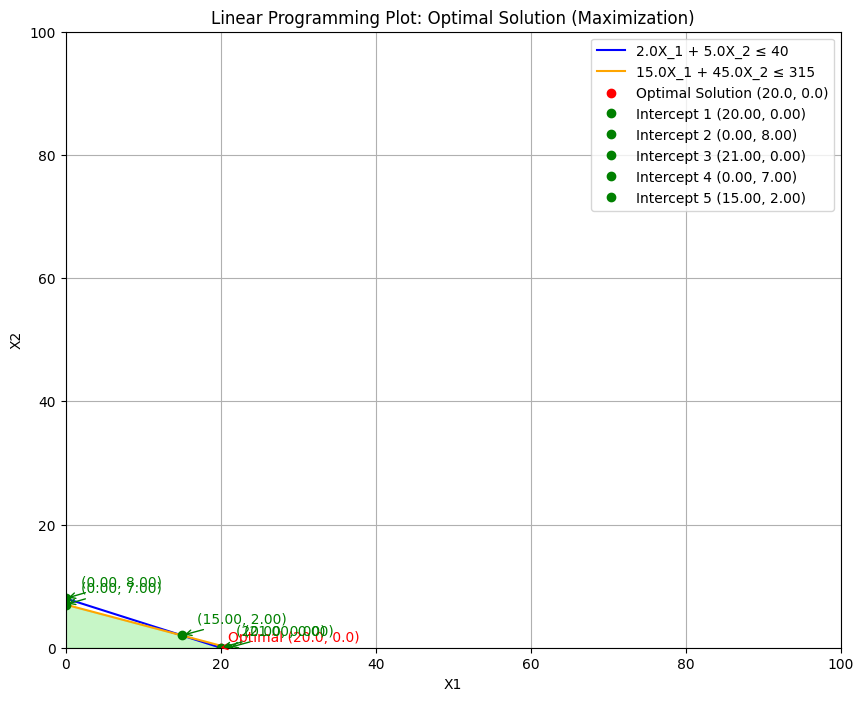

In [11]:
plt.figure(figsize=(10, 8))

x = np.linspace(0, 80, 200)

# Inequality constraint 1: C1 * X1 + C2 * X2 <= Right_hand_value1
plt.plot(x, (right_hand_values[0] - constraints[0][0] * x) / constraints[0][1],
         label=f'{constraints[0][0]}X_1 + {constraints[0][1]}X_2 ≤ {right_hand_values[0]}', color='blue')

# Inequality constraint 2: C1 * X1 + C2 * X2 <= Right_hand_value2
plt.plot(x, (right_hand_values[1] - constraints[1][0] * x) / constraints[1][1],
         label=f'{constraints[1][0]}X_1 + {constraints[1][1]}X_2 ≤ {right_hand_values[1]}', color='orange')

# Feasible region
y1 = (right_hand_values[0] - constraints[0][0] * x) / constraints[0][1]
y2 = (right_hand_values[1] - constraints[1][0] * x) / constraints[1][1]
plt.fill_between(x, np.minimum(y1, y2), where=(x >= 0) & (np.minimum(y1, y2) >= 0), 
                 color='lightgreen', alpha=0.5)

plt.plot((optimal_x1), (optimal_x2), 'ro', label=f'Optimal Solution ({(optimal_x1)}, {(optimal_x2)})')

plt.annotate(f'Optimal ({optimal_x1}, {optimal_x2})', 
             xy=(optimal_x1, optimal_x2), 
             xytext=(optimal_x1 + 1, optimal_x2 + 1),  
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')


for idx, (x, y) in enumerate(vertices):
    plt.plot(x, y, 'go', label=f'Intercept {idx + 1} ({x:.2f}, {y:.2f})')  
    plt.annotate(f'({x:.2f}, {y:.2f})', xy=(x, y), 
                 xytext=(x + 2, y + 2), 
                 arrowprops=dict(arrowstyle='->', color='green'),
                 fontsize=10, color='green')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Programming Plot: Optimal Solution (Maximization)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()

plt.show()